In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.utils import shuffle
import seaborn as sns

In [13]:
cancer=pd.read_csv('C:/Users/rabia/Desktop/Thinkful/Capstone Project 2/Breast Cancer Wisconsin (Diagnostic) Data Set/data.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

## Data Cleaning

In [15]:
total_missing = cancer.isnull().sum().sort_values(ascending=False)
percent_missing = (cancer.isnull().sum()/cancer.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Unnamed: 32,569,1.0
area_se,0,0.0
diagnosis,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0


The column "Unnamed: 32" will be dropped since it is full of missing values and unidentifiable, the "id" column will be dropped because it has not contibution to our analysis

In [16]:
cancer = cancer.drop(['Unnamed: 32', 'id'], axis = 1)

In [17]:
total_missing = cancer.isnull().sum().sort_values(ascending=False)
percent_missing = (cancer.isnull().sum()/cancer.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
fractal_dimension_worst,0,0.0
area_se,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0
perimeter_mean,0,0.0


In [18]:
# change the diagnosis column to binary where 0 representing bengin diagnosis and 1 representing malignant
cancer.diagnosis = cancer.diagnosis.map(lambda x: 0 if x is 'B' else 1)

In [131]:
#Defining the dependant and indepoendant variables
X = cancer.drop(['diagnosis'], axis = 1)
Y = cancer.diagnosis

## Nueral Network Solution

In [136]:
from sklearn import neural_network
mlp = MLPClassifier(max_iter=1000)
parameters = {'solver': ['lbfgs'], 'max_iter': [500,1000,1500], 'alpha': 10.0 ** -np.arange(1, 7), 
              'hidden_layer_sizes':np.arange(1, 12), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf_grid = GridSearchCV(neural_network.MLPClassifier(), parameters, n_jobs=-1, cv=5)
clf_grid.fit(X,Y.values.ravel())

print("-----------------Original Features--------------------")
print("Best score: %0.4f" % clf_grid.best_score_)
print("Using the following parameters:")
print(clf_grid.best_params_)


C:\Users\rabia\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


-----------------Original Features--------------------
Best score: 0.9613
Using the following parameters:
{'alpha': 0.1, 'hidden_layer_sizes': 9, 'max_iter': 1000, 'random_state': 0, 'solver': 'lbfgs'}


In [170]:
clf = neural_network.MLPClassifier(alpha=0.1, hidden_layer_sizes=(9), max_iter=1000, random_state=0, solver='lbfgs')
clf.fit(X, Y.values.ravel())
# Cross validate and get scores
mlp_score = cross_val_score(clf, X, Y, cv=5)
print(mlp_score)
print("MLP Model Accuracy: %0.4f (+/- %0.4f)" % (mlp_score.mean(), mlp_score.std() * 2))

[0.93913043 0.93913043 0.97345133 0.92035398 0.9380531 ]
MLP Model Accuracy: 0.9420 (+/- 0.0345)


In [171]:
Y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(Y_test, Y_pred)

Text(0.5, 257.44, 'Predicted label')

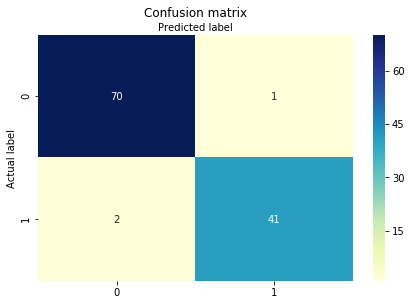

In [172]:
class_names=['bengin', 'malignant'] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

In [173]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

   micro avg       0.97      0.97      0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Random Forest Solution

In [150]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [151]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfs = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfs, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [152]:
# Fit the grid search to the data
grid_search.fit(X, Y)
grid_search.best_params_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  5.8min finished
C:\Users\rabia\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 100}

In [164]:
rfc = ensemble.RandomForestClassifier(bootstrap = True, max_depth = 90, max_features = 3, min_samples_leaf = 5, 
                                      min_samples_split = 8, n_estimators = 100)

In [165]:
rfc.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=90, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [166]:
rfc_score = (cross_val_score(rfc, X, Y, cv=5))
print(rfc_score)
print("RFC Model Accuracy: %0.4f (+/- %0.4f)" % (rfc_score.mean(), rfc_score.std() * 2))

[0.93043478 0.93913043 0.99115044 0.97345133 0.97345133]
RFC Model Accuracy: 0.9615 (+/- 0.0459)


In [167]:
Y_pred = rfc.predict(X_test)

from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(Y_test, Y_pred)

Text(0.5, 257.44, 'Predicted label')

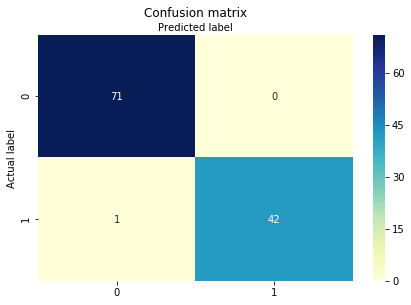

In [168]:
class_names=['bengin', 'malignant'] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

In [169]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

   micro avg       0.99      0.99      0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



## Conculsion

Random Forest Solution is more accurate with only one wrong presdiction but it is more computiotion expensive compare to the nueral network